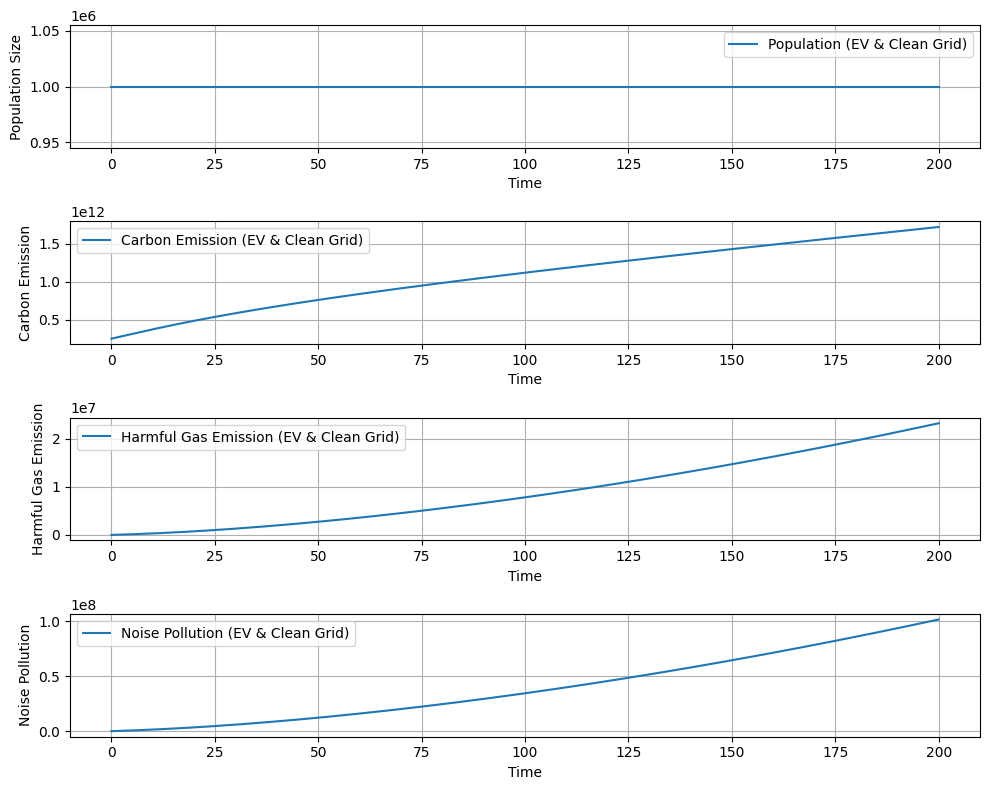

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model_environment(y, t, growth_rate_population, growth_rate_fuel, carrying_capacity_fuel, competition_coefficient, carbon_coefficient_fuel, avg_emission_fuel, ev_percentage,
                       clean_grid_level, harmful_gas_coefficient_fuel, noise_coefficient_fuel, ev_carbon_coefficient, ev_harmful_gas_coefficient, ev_noise_coefficient, ev_replace_rate, public_ev_percentage, public_ev_carbon_coefficient):
    P, F, EV, Harmful_Gas, Noise, Public_EV = y

    dPdt = growth_rate_population * P
    dFdt = growth_rate_fuel * F * (1 - F / carrying_capacity_fuel) * (1 - ev_percentage) * (1 - clean_grid_level) * (1 - ev_replace_rate)
    dEVdt = growth_rate_fuel * F * (1 - F / carrying_capacity_fuel) * ev_percentage * (1 - clean_grid_level) + ev_replace_rate * F
    dPublicEVdt = growth_rate_fuel * F * (1 - F / carrying_capacity_fuel) * public_ev_percentage * (1 - clean_grid_level) + ev_replace_rate * F

    # 计算碳排放，考虑电网清洁化系数
    carbon_emission = carbon_coefficient_fuel * ((F + Public_EV) * avg_emission_fuel * (1 - clean_grid_level))

    # 计算有害气体排放
    harmful_gas_emission = harmful_gas_coefficient_fuel * (F + Public_EV)

    # 计算噪音污染
    noise_pollution = noise_coefficient_fuel * (F + Public_EV)

    # 计算新能源车辆的碳排放、有害气体排放和噪音污染
    ev_carbon_emission = ev_carbon_coefficient * EV
    ev_harmful_gas_emission = ev_harmful_gas_coefficient * EV
    ev_noise_pollution = ev_noise_coefficient * EV

    # 计算公共汽车新能源化对碳排放的影响
    public_ev_carbon_emission = public_ev_carbon_coefficient * Public_EV

    return [dPdt, dFdt, dEVdt, harmful_gas_emission + ev_harmful_gas_emission, noise_pollution + ev_noise_pollution, dPublicEVdt, public_ev_carbon_emission]

# 设置参数
growth_rate_population = 0.0  # 人口增长率
growth_rate_fuel = 0.02  # 燃油车增长率
carrying_capacity_fuel = 500000  # 燃油车承载容量
competition_coefficient = 0.01  # 竞争系数
carbon_coefficient_fuel = 0.5  # 燃油车碳排放系数
avg_emission_fuel = 212 * 13000  # 燃油车平均排放gCO2e/km*每年km数
ev_percentage_initial = 0.01  # 新能源车初始占比
ev_percentage_increase = 0.01  # 新能源车每年增长占比
clean_grid_level_initial = 0.2  # 电网清洁化水平初始值
clean_grid_level_increase = 0.01  # 电网清洁化水平每年增加的量
harmful_gas_coefficient_fuel = 0.1  # 燃油车有害气体排放系数
noise_coefficient_fuel = 0.5  # 燃油车噪音污染系数
ev_carbon_coefficient = 0.5  # 新能源车碳排放系数
ev_harmful_gas_coefficient = 0.02  # 新能源车有害气体排放系数
ev_noise_coefficient = 0.02  # 新能源车噪音污染系数
ev_replace_rate = 0.1
public_ev_percentage_initial = 0.01  # 公共汽车新能源化初始占比
public_ev_percentage_increase = 0.01  # 公共汽车新能源化每年增长占比
public_ev_carbon_coefficient = 0.5  # 公共汽车新能源化碳排放系数

# 设置初始条件
initial_conditions = [1000000, 1000000 * (226 / 1000), 1000000 * (226 / 1000) * (1.7 / 5000), 0, 0, 0, 0]  # 初始人口，燃油车数量，新能源车数量，有害气体排放量，噪音污染程度，公共汽车数量，公共汽车碳排放量

# 设置时间点
time_points = np.linspace(0, 200, 200)

# 求解微分方程
solution = odeint(model_environment, initial_conditions, time_points, args=(
    growth_rate_population, growth_rate_fuel, carrying_capacity_fuel, competition_coefficient, carbon_coefficient_fuel,
    avg_emission_fuel, ev_percentage_initial, clean_grid_level_initial,
    harmful_gas_coefficient_fuel, noise_coefficient_fuel,
    ev_carbon_coefficient, ev_harmful_gas_coefficient, ev_noise_coefficient, ev_replace_rate, public_ev_percentage_initial, public_ev_carbon_coefficient))

# 提取结果
P, F, EV, Harmful_Gas, Noise, Public_EV, Public_EV_Carbon = solution.T

# 计算碳排放、有害气体排放和噪音污染程度
carbon_emission = carbon_coefficient_fuel * ((F + Public_EV) * avg_emission_fuel * (1 - clean_grid_level_initial))
harmful_gas_emission = harmful_gas_coefficient_fuel * (F + Public_EV)
noise_pollution = noise_coefficient_fuel * (F + Public_EV)

# 绘制结果
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(time_points, P, label='Population (EV & Clean Grid)')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)


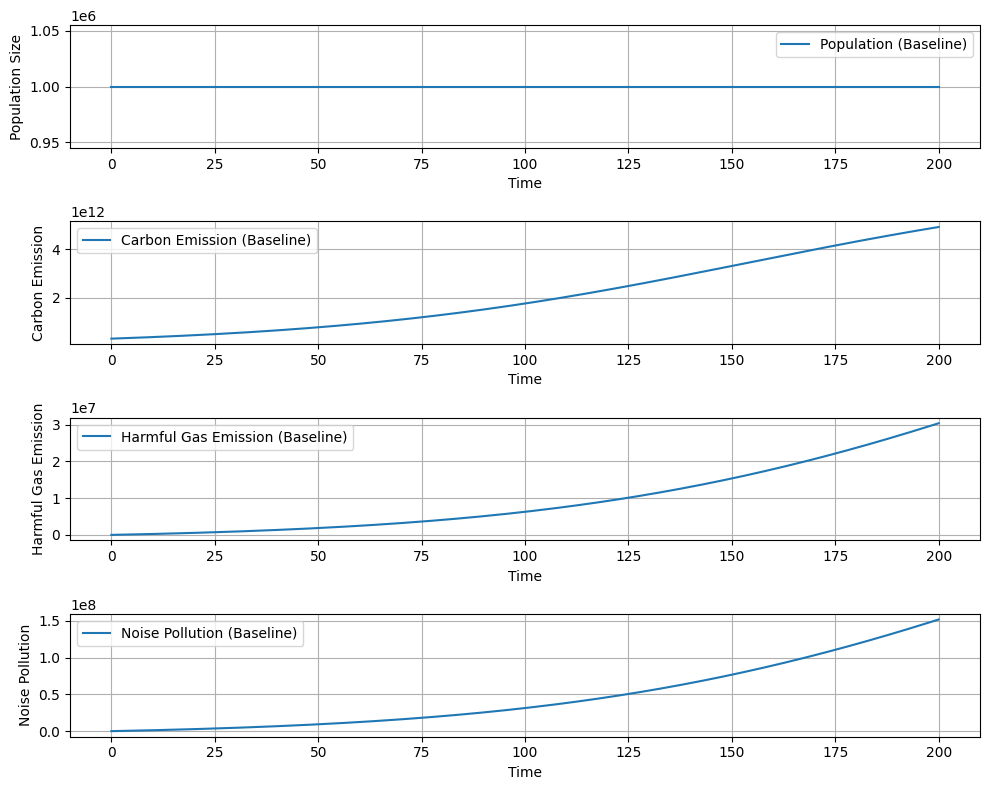

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model_baseline(y, t, growth_rate_population, growth_rate_fuel, carrying_capacity_fuel, competition_coefficient, carbon_coefficient_fuel, avg_emission_fuel, harmful_gas_coefficient_fuel, noise_coefficient_fuel):
    P, F, Harmful_Gas, Noise = y

    dPdt = growth_rate_population * P
    dFdt = growth_rate_fuel * F * (1 - F / carrying_capacity_fuel) * (1 - competition_coefficient)

    # 计算碳排放，考虑电网清洁化系数
    carbon_emission = carbon_coefficient_fuel * (F * avg_emission_fuel)

    # 计算有害气体排放
    harmful_gas_emission = harmful_gas_coefficient_fuel * F

    # 计算噪音污染
    noise_pollution = noise_coefficient_fuel * F

    return [dPdt, dFdt, harmful_gas_emission, noise_pollution]

# 设置参数
growth_rate_population_baseline = 0.0  # 人口增长率
growth_rate_fuel_baseline = 0.02  # 燃油车增长率
carrying_capacity_fuel_baseline = 5000000  # 燃油车承载容量
competition_coefficient_baseline = 0.01  # 竞争系数
carbon_coefficient_fuel_baseline = 0.5  # 燃油车碳排放系数
avg_emission_fuel_baseline = 212*13000  # 燃油车平均排放
harmful_gas_coefficient_fuel_baseline = 0.1  # 燃油车有害气体排放系数
noise_coefficient_fuel_baseline = 0.5  # 燃油车噪音污染系数

# 设置初始条件
initial_conditions_baseline = [1000000, 1000000*(226/1000), 0, 0]  # 初始人口，燃油车数量，有害气体排放量，噪音污染程度

# 设置时间点
time_points_baseline = np.linspace(0, 200, 200)

# 求解微分方程
solution_baseline = odeint(model_baseline, initial_conditions_baseline, time_points_baseline, args=(
    growth_rate_population_baseline, growth_rate_fuel_baseline, carrying_capacity_fuel_baseline, competition_coefficient_baseline, carbon_coefficient_fuel_baseline,
    avg_emission_fuel_baseline, harmful_gas_coefficient_fuel_baseline, noise_coefficient_fuel_baseline))

# 提取结果
P_baseline, F_baseline, Harmful_Gas_baseline, Noise_baseline = solution_baseline.T

# 计算碳排放、有害气体排放和噪音污染程度
carbon_emission_baseline = carbon_coefficient_fuel_baseline * (F_baseline * avg_emission_fuel_baseline)
harmful_gas_emission_baseline = harmful_gas_coefficient_fuel_baseline * F_baseline
noise_pollution_baseline = noise_coefficient_fuel_baseline * F_baseline
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(time_points_baseline, P_baseline, label='Population (Baseline)')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid()
plt.subplot(4, 1, 2)
plt.plot(time_points_baseline, carbon_emission_baseline, label='Carbon Emission (Baseline)')
plt.xlabel('Time')
plt.ylabel('Carbon Emission')
plt.legend()
plt.grid()
plt.subplot(4, 1, 3)
plt.plot(time_points_baseline, Harmful_Gas_baseline, label='Harmful Gas Emission (Baseline)')
plt.xlabel('Time')
plt.ylabel('Harmful Gas Emission')
plt.legend()
plt.grid()
plt.subplot(4, 1, 4)
plt.plot(time_points_baseline, Noise_baseline, label='Noise Pollution (Baseline)')
plt.xlabel('Time')
plt.ylabel('Noise Pollution')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
